In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

### Finding the Pico's internal resistance

When disconnecting the ground from the voltage bus, measure the voltage $V_{msmt}$ and determine $R_{pico}$ using:

\begin{equation}
\frac{V_{msmt}}{3.3} = \frac{R_{pico}}{R_{ref}+R_{pico}}
\end{equation}

In [2]:
R_ref = 10
V_msmt = 2.6954 # 2.72

x = symbols('x')
eq1 = Eq(x/(x+R_ref), V_msmt/3.3)
R_pico = solve(eq1, x)[0]
print(f"R_pico = {round(R_pico,2)} kOhm")

R_pico = 44.58 kOhm


### Findig the thermal resistance from a measured voltage

See if you can accurately predict different resistances R_T (ground side), when using a constant R_pico.

In [3]:
def R_T(V, R_ref):
    return round(1/((3.3/V-1)/R_ref - 1/R_pico),2)

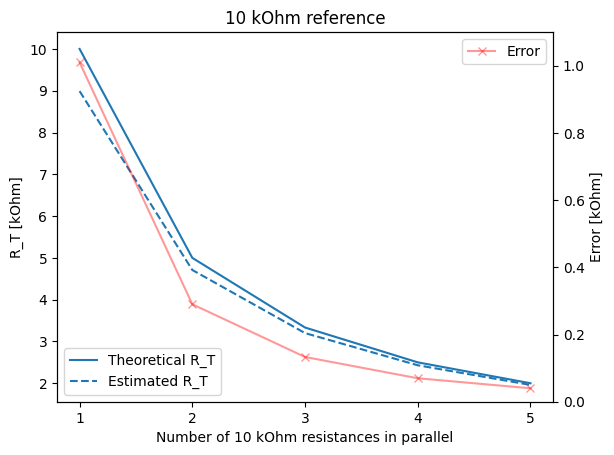

In [4]:
V_adc = [1.412272, 0.9857, 0.75817, 0.6180418, 0.5224292]
R_true = [10/x for x in range(1,len(V_adc)+1)]
R_adc = [R_T(x, R_ref=10) for x in V_adc]

fig, ax = plt.subplots(1,1)
ax.plot([x+1 for x in range(len(V_adc))], R_true, color='tab:blue', label="Theoretical R_T")
ax.plot([x+1 for x in range(len(V_adc))], R_adc, color='tab:blue', linestyle='dashed', label="Estimated R_T")
ax.set_xticks([x for x in range(len(V_adc)+1)])
ax.set_xlabel('Number of 10 kOhm resistances in parallel')
ax.set_ylabel('R_T [kOhm]')
ax.legend(loc='lower left')
ax2 = ax.twinx()
ax2.plot([np.nan] + [(R_true[i]-R_adc[i]) for i in range(len(R_true))], '-x', alpha=0.4, color='red', label="Error")
ax2.set_ylabel('Error [kOhm]')
ax2.set_ylim([0,1.1])
ax2.legend()
plt.title('10 kOhm reference')
plt.plot()

error_10 = [(R_true[i]-R_adc[i]) for i in range(len(R_true))]

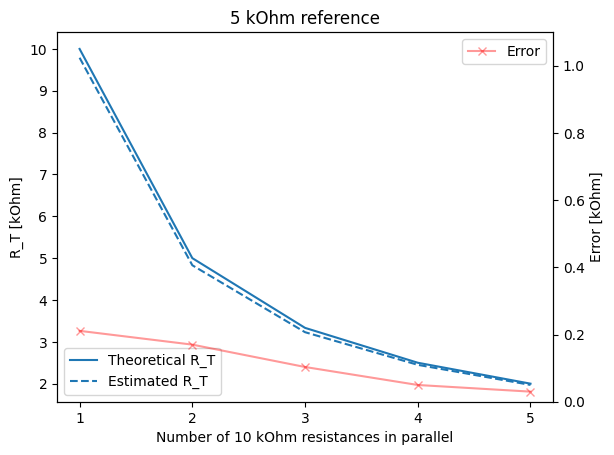

In [5]:
V_adc = [2.033098, 1.536289, 1.241078, 1.047803, 0.9053327]
R_true = [10/x for x in range(1,len(V_adc)+1)]
R_adc = [R_T(x, R_ref=5) for x in V_adc]

fig, ax = plt.subplots(1,1)
ax.plot([x+1 for x in range(len(V_adc))], R_true, color='tab:blue', label="Theoretical R_T")
ax.plot([x+1 for x in range(len(V_adc))], R_adc, color='tab:blue', linestyle='dashed', label="Estimated R_T")
ax.set_xticks([x for x in range(len(V_adc)+1)])
ax.set_xlabel('Number of 10 kOhm resistances in parallel')
ax.set_ylabel('R_T [kOhm]')
ax.legend(loc='lower left')
ax2 = ax.twinx()
ax2.plot([np.nan] + [(R_true[i]-R_adc[i]) for i in range(len(R_true))], '-x', alpha=0.4, color='red', label="Error")
ax2.set_ylabel('Error [kOhm]')
ax2.legend()
ax2.set_ylim([0,1.1])
plt.title('5 kOhm reference')
plt.plot()

error_5 = [(R_true[i]-R_adc[i]) for i in range(len(R_true))]

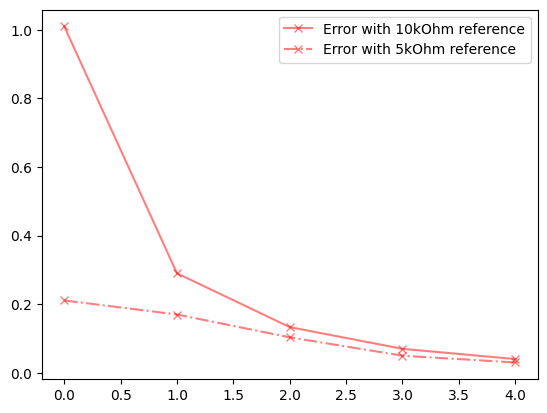

In [6]:
plt.plot(error_10, '-x', alpha=0.5, color='red', label="Error with 10kOhm reference")
plt.plot(error_5, '-.x', alpha=0.5, color='red', label="Error with 5kOhm reference")
plt.legend()
plt.show()